# Explore Obesity Data 01
Some initial work on the core indicators.  
**Author:** Matthias Titze s0563413

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**File Pathes**

In [2]:
pwd

'/Users/matthiastitze/Uni HTW/DataScience/Repositories/datafriends_workshop/explore_data'

In [3]:
# File pathes for quick adjustment if places or directories change.
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')

## Refine Obesity Data  
Extraxt the required data from the original raw data source and clean or refine it.

**Initial Dataframe**  
We use data provided by:
**United States Department of Agriculture**  
https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version  
This data is provided as an Excel file with multiple sheets.
The values of the food atlas are collected for each US county which are identified by their FIPS-code.

In [8]:
# Load the health table from the food atlas data and extract the columns dealing with obesity.
df_health = pd.read_excel(path_atlas, sheet_name='HEALTH')
df_obesity = df_health[['FIPS', 'County', 'State', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13']].copy()

# Show some information about the dataframe we extracted so far.
print('{:<25} {:d}'.format('Number of entries:', len(df_obesity.index)))
df_obesity[:3]

Number of entries:        3143


,FIPS,County,State,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13
0,1001,Autauga,AL,31.5,34.1
1,1003,Baldwin,AL,26.2,27.4
2,1005,Barbour,AL,37.6,44.4


**Modified Dataframe**  
We now want to further refine our extracted dataframe and add some interesting values.

In [9]:
# Rename the columns to allow for better reading and referencing in the future.
df_obesity.rename(columns={'FIPS':'county_fips','County':'county','State':'state', \
                           'PCT_OBESE_ADULTS08':'PCT_obese_adults_2008', \
                           'PCT_OBESE_ADULTS13':'PCT_obese_adults_2013'}, inplace=True)

# Add some colums of values (average, change) derived directly from the ones that where in the atlas.
df_obesity['PCT_obese_adults_average'] = round((df_obesity['PCT_obese_adults_2008'] + df_obesity['PCT_obese_adults_2013'])/2, 3)
df_obesity['PCT_obese_adults_change'] = round(df_obesity['PCT_obese_adults_2013'] - df_obesity['PCT_obese_adults_2008'], 3)
df_obesity[:3]

,county_fips,county,state,PCT_obese_adults_2008,PCT_obese_adults_2013,PCT_obese_adults_average,PCT_obese_adults_change
0,1001,Autauga,AL,31.5,34.1,32.8,2.6
1,1003,Baldwin,AL,26.2,27.4,26.8,1.2
2,1005,Barbour,AL,37.6,44.4,41.0,6.8


**Store Result in File**  
Why not store this nice new dataframe as a .csv file for later use.

In [10]:
df_obesity.to_csv(path_obesity, index=False)

## Inspect Results  
Plot the dataframe data to get a visual understanding of the data. Also create a data description table.

**Obesity Data Description Frame**

In [11]:
ob_columns = ['PCT_obese_adults_2008','PCT_obese_adults_2008','PCT_obese_adults_average','PCT_obese_adults_change']
df_obesity_description = round(df_obesity[ob_columns].describe(), 3).transpose()
df_obesity_description

,count,mean,std,min,25%,50%,75%,max
PCT_obese_adults_2008,3138.0,28.931,3.711,11.70,27.20,29.10,31.00,43.7
PCT_obese_adults_2008,3138.0,28.931,3.711,11.70,27.20,29.10,31.00,43.7
PCT_obese_adults_average,3137.0,29.974,3.935,12.35,27.85,30.25,32.35,45.0
PCT_obese_adults_change,3137.0,2.086,2.566,-6.90,0.40,2.00,3.70,13.0


In [12]:
path_obesity_description = os.path.join(path_inter, 'obesity_refined_decription.csv')
df_obesity_description.to_csv(path_obesity_description)

**Distribution Plots**

In [10]:
def plot_distribution(title, series, bins, color):
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False)

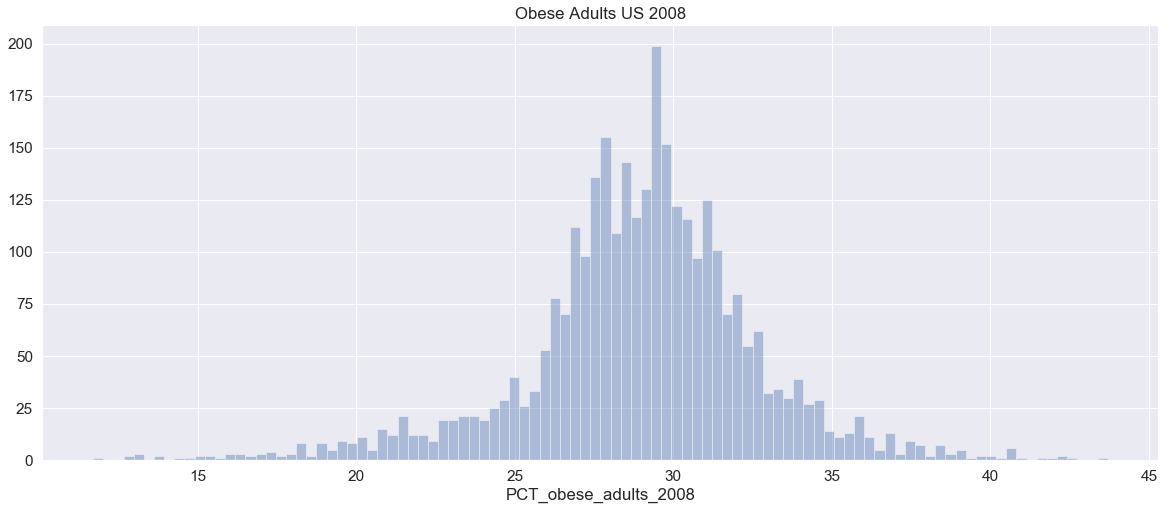

In [14]:
plot_distribution('Obese Adults US 2008', df_obesity['PCT_obese_adults_2008'], 100, 'b')

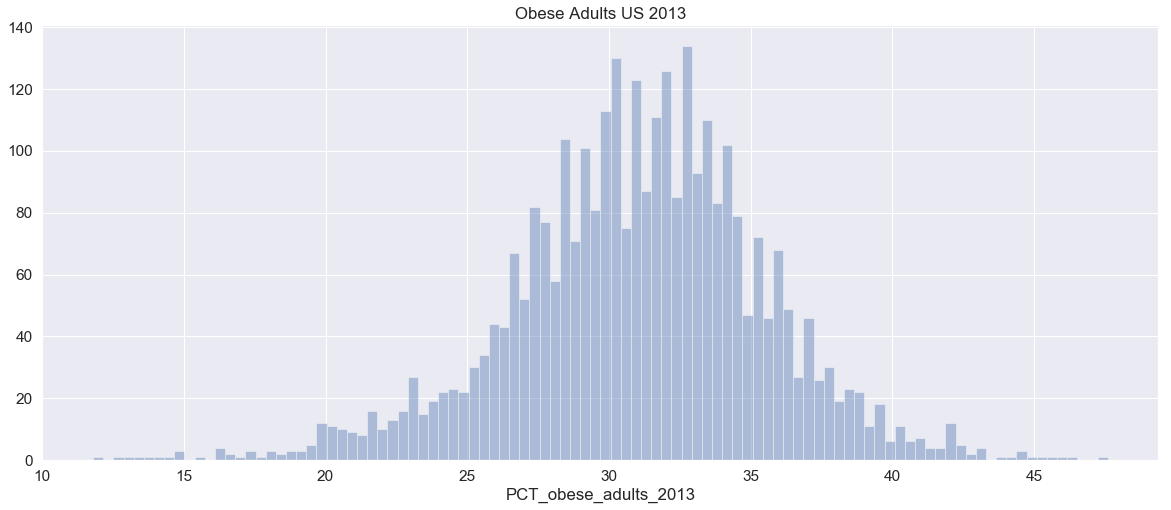

In [11]:
plot_distribution('Obese Adults US 2013', df_obesity['PCT_obese_adults_2013'], 100, 'b')

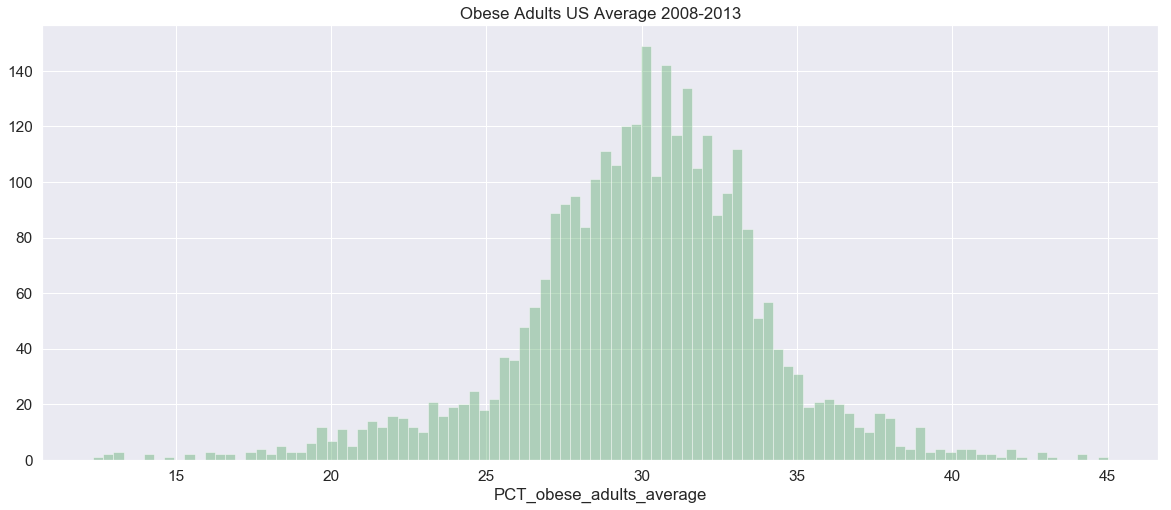

In [12]:
plot_distribution('Obese Adults US Average 2008-2013', df_obesity['PCT_obese_adults_average'], 100, 'g')

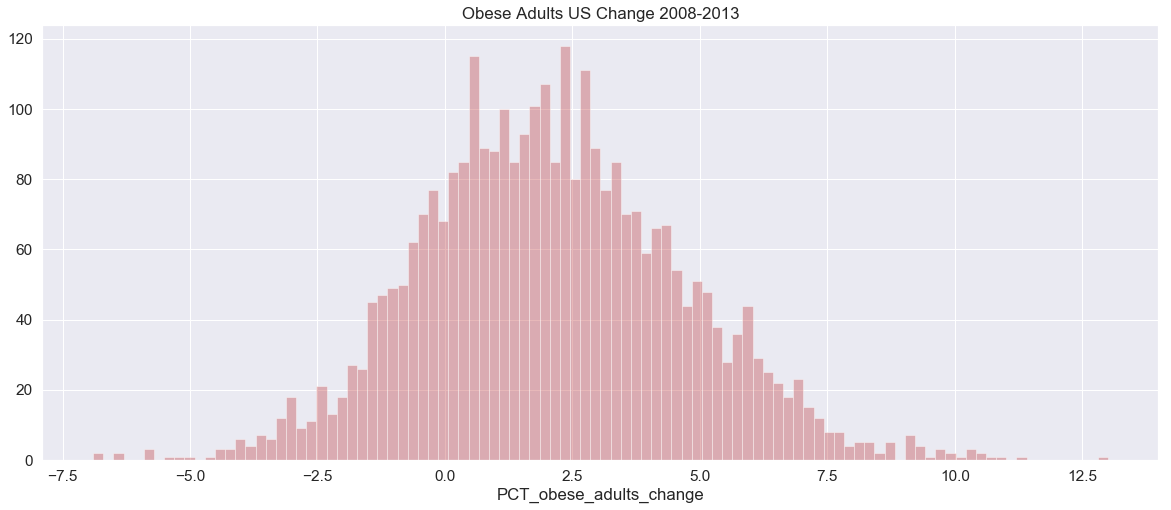

In [13]:
plot_distribution('Obese Adults US Change 2008-2013', df_obesity['PCT_obese_adults_change'], 100, 'r')

**Depricated:**  We keep some depricated stuff for study purposes. The functionality however has been replaced.

In [74]:
# Pandas plotting procedures which are not needed anymore as we use seaborn.
# df_obesity['PCT_obese_adults_2008'].plot.hist(bins=100, figsize=[20,10], title='Obese Adults US 2008')
# df_obesity['PCT_obese_adults_2013'].plot.hist(bins=100, figsize=[20,10], title='Obese Adults US 2013')

In [78]:
# Calculating decriptive values manually is not needed anymore as we use decribe()
series_obese_change = df_obesity['PCT_obese_adults_change']
mean_obese_change = series_obese_change.mean()
median_obese_change = series_obese_change.median()
stddev_obese_change = series_obese_change.std()

print('Change of adult obesity from 2008 to 2013:')
print('{:<15} {:.3f}'.format('Mean:', mean_obese_change))
print('{:<15} {:.3f}'.format('Median:', median_obese_change))
print('{:<15} {:.3f}'.format('Deviation:', stddev_obese_change))

Change of adult obesity from 2008 to 2013:
Mean:           2.086
Median:         2.000
Deviation:      2.566
